# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

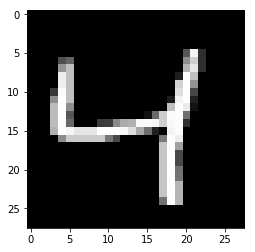

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [6]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6950
Epoch: 1/20... Training loss: 0.6921
Epoch: 1/20... Training loss: 0.6890
Epoch: 1/20... Training loss: 0.6861
Epoch: 1/20... Training loss: 0.6823
Epoch: 1/20... Training loss: 0.6778
Epoch: 1/20... Training loss: 0.6718
Epoch: 1/20... Training loss: 0.6657
Epoch: 1/20... Training loss: 0.6572
Epoch: 1/20... Training loss: 0.6474
Epoch: 1/20... Training loss: 0.6377
Epoch: 1/20... Training loss: 0.6250
Epoch: 1/20... Training loss: 0.6129
Epoch: 1/20... Training loss: 0.5976
Epoch: 1/20... Training loss: 0.5801
Epoch: 1/20... Training loss: 0.5610
Epoch: 1/20... Training loss: 0.5461
Epoch: 1/20... Training loss: 0.5273
Epoch: 1/20... Training loss: 0.5089
Epoch: 1/20... Training loss: 0.4902
Epoch: 1/20... Training loss: 0.4735
Epoch: 1/20... Training loss: 0.4521
Epoch: 1/20... Training loss: 0.4341
Epoch: 1/20... Training loss: 0.4200
Epoch: 1/20... Training loss: 0.3980
Epoch: 1/20... Training loss: 0.3895
Epoch: 1/20... Training loss: 0.3683
E

Epoch: 1/20... Training loss: 0.1775
Epoch: 1/20... Training loss: 0.1767
Epoch: 1/20... Training loss: 0.1756
Epoch: 1/20... Training loss: 0.1792
Epoch: 1/20... Training loss: 0.1830
Epoch: 1/20... Training loss: 0.1822
Epoch: 1/20... Training loss: 0.1795
Epoch: 1/20... Training loss: 0.1824
Epoch: 1/20... Training loss: 0.1765
Epoch: 1/20... Training loss: 0.1813
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1730
Epoch: 1/20... Training loss: 0.1800
Epoch: 1/20... Training loss: 0.1777
Epoch: 2/20... Training loss: 0.1807
Epoch: 2/20... Training loss: 0.1747
Epoch: 2/20... Training loss: 0.1798
Epoch: 2/20... Training loss: 0.1746
Epoch: 2/20... Training loss: 0.1789
Epoch: 2/20... Training loss: 0.1786
Epoch: 2/20... Training loss: 0.1749
Epoch: 2/20... Training loss: 0.1745
Epoch: 2/20... Training loss: 0.1790
Epoch: 2/20... Training loss: 0.1727
Epoch: 2/20... Training loss: 0.1805
Epoch: 2/20... Training loss: 0.1773
Epoch: 2/20... Training loss: 0.1780
E

Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1454
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1476
Epoch: 2/20... Training loss: 0.1478
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1448
Epoch: 2/20... Training loss: 0.1468
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1476
Epoch: 2/20... Training loss: 0.1431
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1505
Epoch: 2/20... Training loss: 0.1467
Epoch: 2/20... Training loss: 0.1490
Epoch: 2/20... Training loss: 0.1491
Epoch: 2/20... Training loss: 0.1434
Epoch: 2/20... Training loss: 0.1473
Epoch: 2/20... Training loss: 0.1451
Epoch: 2/20... Training loss: 0.1477
Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1474
Epoch: 2/20... Training loss: 0.1461
E

Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1235
Epoch: 3/20... Training loss: 0.1271
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1284
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1235
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1284
Epoch: 3/20... Training loss: 0.1285
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1303
Epoch: 3/20... Training loss: 0.1259
Epoch: 3/20... Training loss: 0.1249
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1294
E

Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1182
E

Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1170
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1081
E

Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1133
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1115
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1108
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1130
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1112
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1077
E

Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.0995
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1012
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1047
E

Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0964
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0953
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.1008
E

Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0936
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0931
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0999
E

Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.1007
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0952
E

Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.1021
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.1005
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0994
Epoch: 11/20... Training loss: 0.0995
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.1006
Epoch: 11/20... Training loss: 0.0992
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0990
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.1004
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0995
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0892
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0879
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0891
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0979
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0980
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0975
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0975
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0899
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0895
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0989
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0895
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0893
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0891
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0889


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

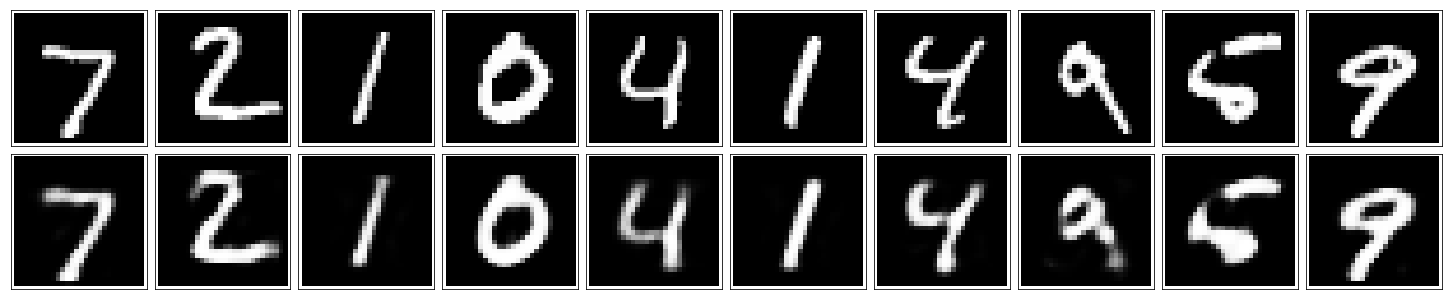

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.